# Lab 7
Seuillage global et adaptatif.

In [2]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
import numpy as np
from scipy import ndimage as ndi
from skimage.segmentation import watershed

## Exercice 1
Segmenter l'avant-plan de l'image avec le threshold d'Otsu. Avec le masque obtenu, retirer l'arrière-plan de l'image et afficher la.
> Utiliser la fonction `skimage.filters.threshold_otsu`

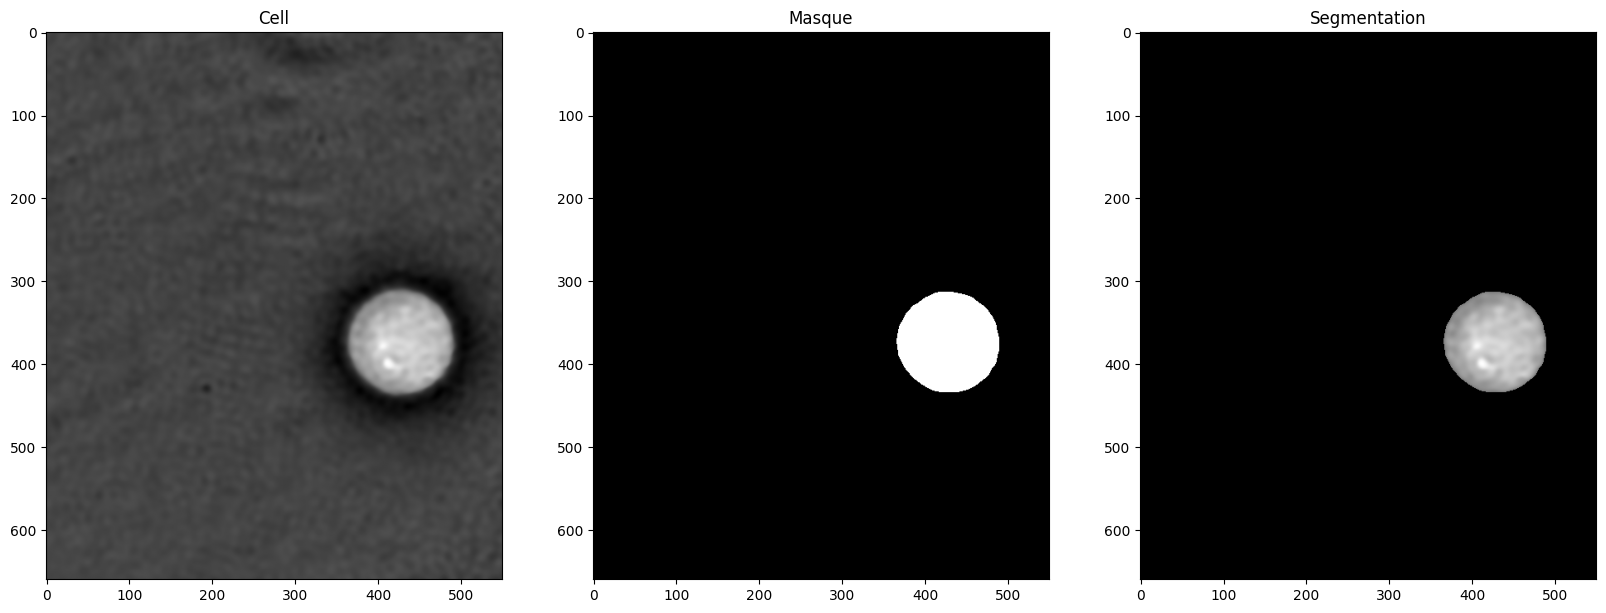

In [3]:
img = data.cell()
plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Cell')

threshold = filters.threshold_otsu(img)
mask = img >= threshold
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('Masque')

seg = img.copy()
seg[mask == False] = 0
plt.subplot(133); plt.imshow(seg, cmap='gray'); plt.title('Segmentation')

plt.show()

## Exercice 2
Segmenter l'arrière-plan de l'image avec le threshold de Li. Avec le masque obtenu, retirer l'avant-plan de l'image et afficher l'arrière-plan..
> Utiliser la fonction `skimage.filters.threshold_li`

## Note 

L'énoncé demande d'utiliser `li` mais utilise `triangle` pour la réponse, je mets donc les deux ici !

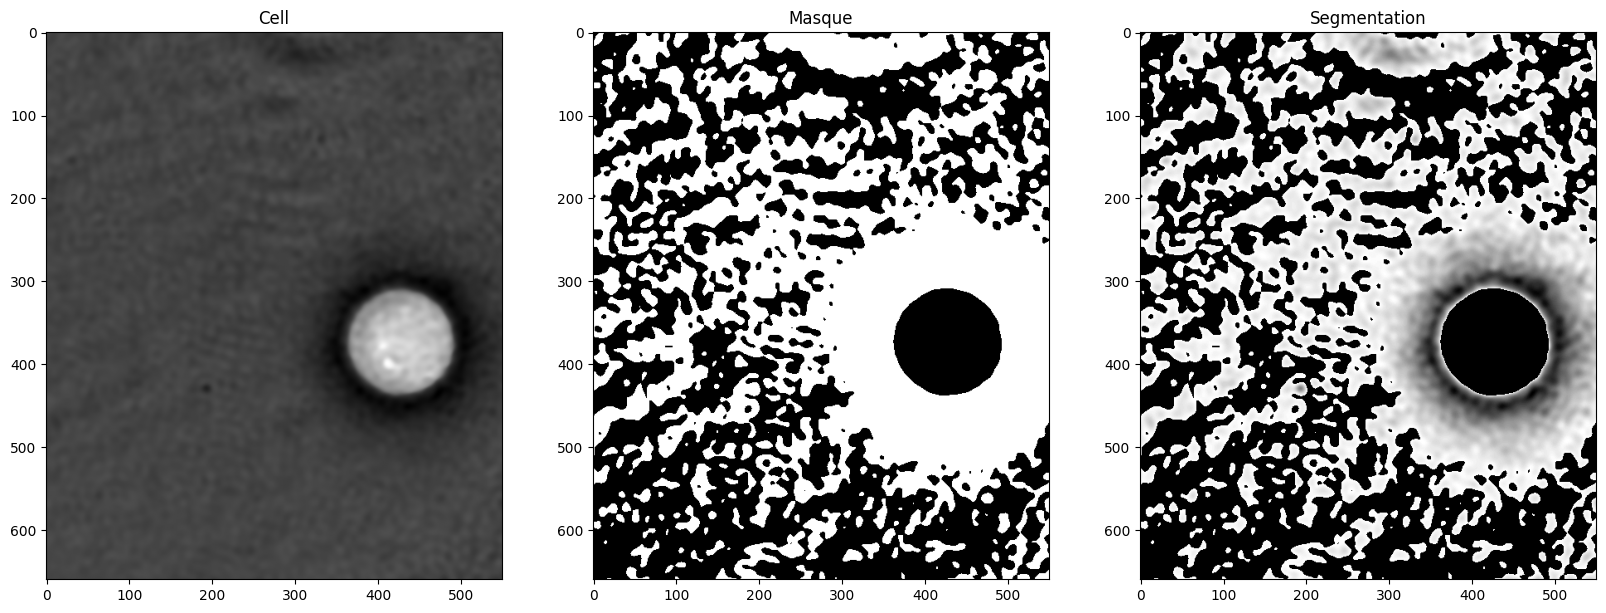

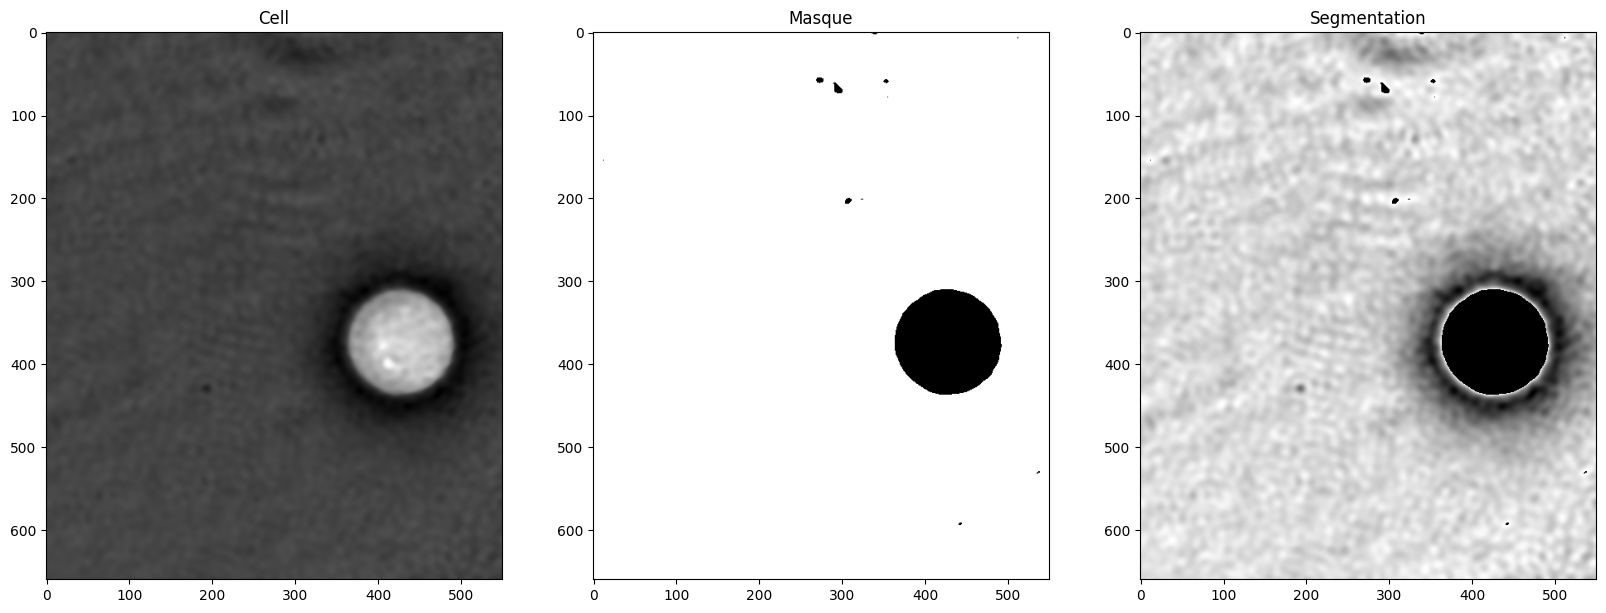

In [9]:
img = data.cell()
plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Cell')

threshold = filters.threshold_li(img)
mask = img < threshold
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('Masque')

seg = img.copy()
seg[mask == False] = 0
plt.subplot(133); plt.imshow(seg, cmap='gray'); plt.title('Segmentation')

plt.show()


img = data.cell()
plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Cell')

threshold = filters.threshold_triangle(img)
mask = img < threshold
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('Masque')

seg = img.copy()
seg[mask == False] = 0
plt.subplot(133); plt.imshow(seg, cmap='gray'); plt.title('Segmentation')

plt.show()

## Exercice 3
Segmenter l'arrière-avant de l'image en suivant ces étapes:
- Trouver les coutours avec Sobel (`skimage.filters.sobel`)
- Utiliser la méthode watershed avec le `markers` déjà définit et les coutours trouver avec Sobel comme carte d'élévation (`skimage.segmentation.watershed`)
> Pris de https://scikit-image.org/docs/dev/auto_examples/applications/plot_coins_segmentation.html#sphx-glr-auto-examples-applications-plot-coins-segmentation-py

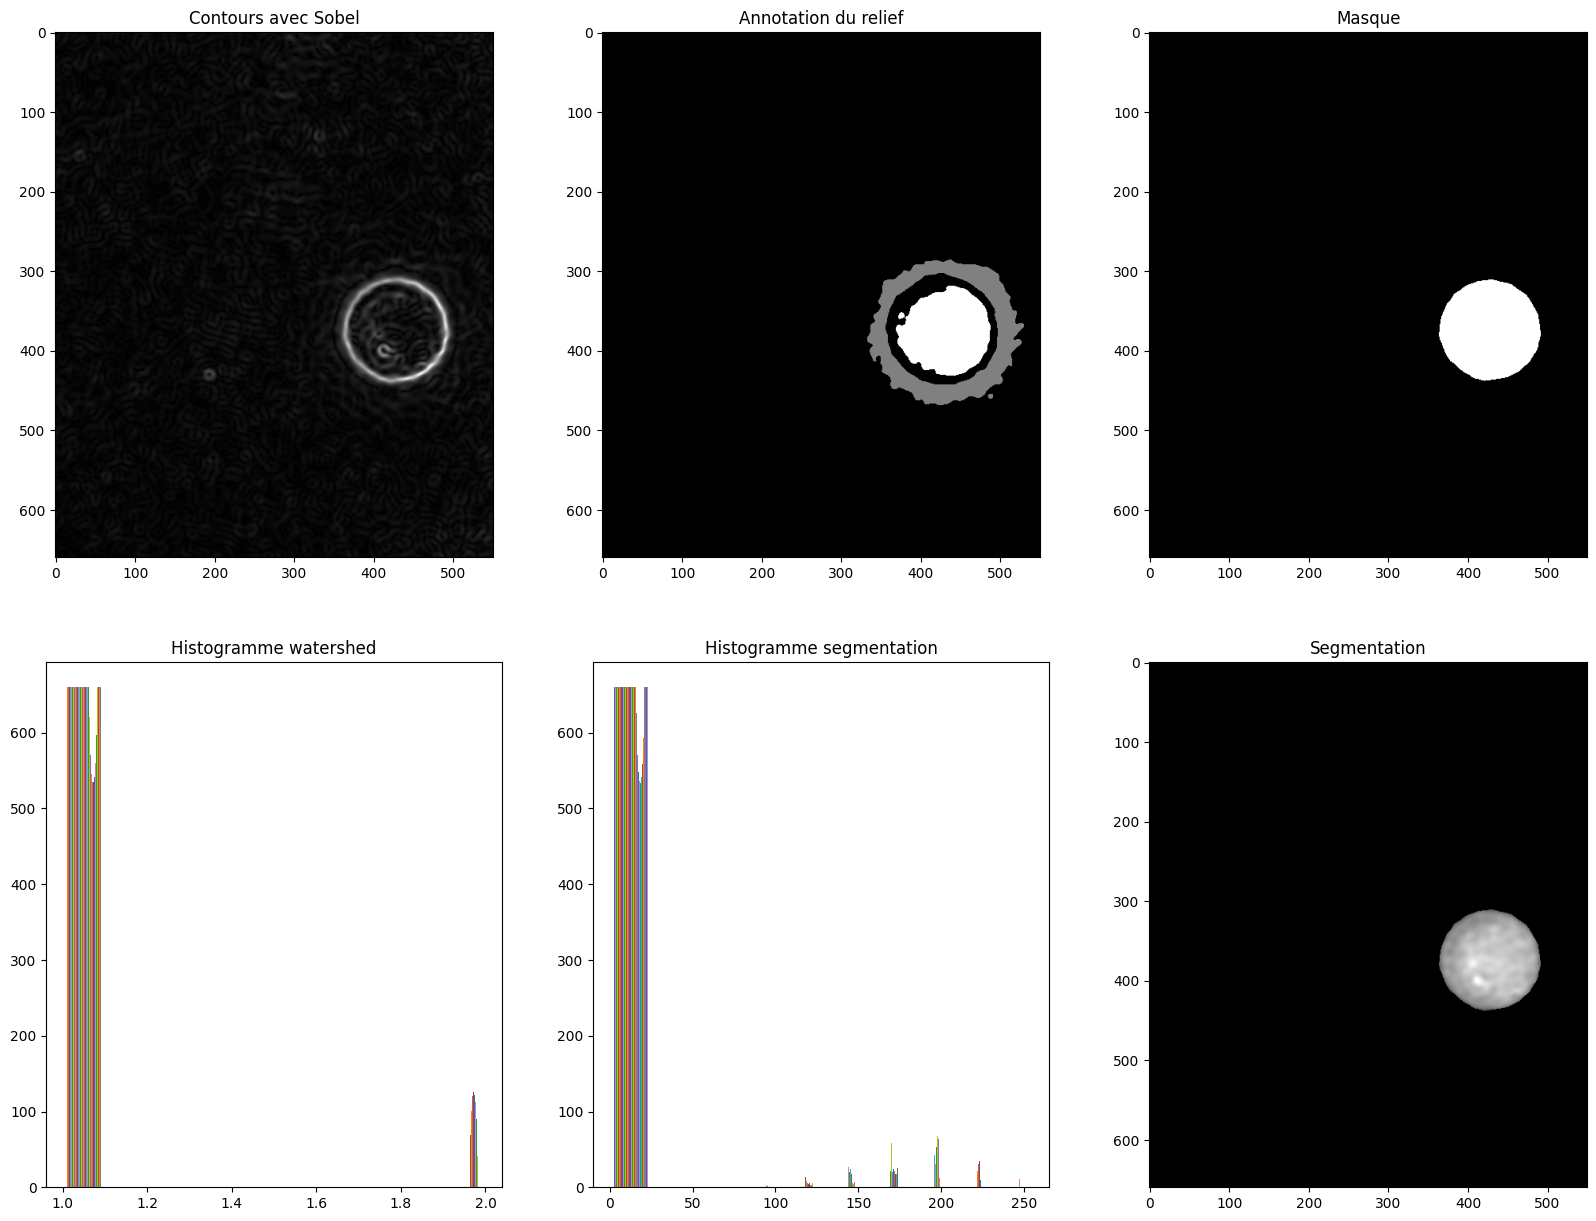

In [8]:
plt.figure(figsize=(20, 15))

elevation_map = filters.sobel(img)
plt.subplot(231); plt.imshow(elevation_map, cmap='gray'); plt.title('Contours avec Sobel')

markers = np.zeros_like(img)
markers[img < 30] = 1
markers[img > 150] = 2
plt.subplot(232); plt.imshow(markers, cmap='gray'); plt.title('Annotation du relief')

mask = watershed(elevation_map, markers)
plt.subplot(234);plt.hist(mask);plt.title('Histogramme watershed')
plt.subplot(233); plt.imshow(mask, cmap='gray'); plt.title('Masque')

seg = img.copy()
seg[mask == 1] = 0
plt.subplot(235); plt.hist(seg); plt.title('Histogramme segmentation')
plt.subplot(236); plt.imshow(seg, cmap='gray'); plt.title('Segmentation')

plt.show()